In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

data = pd.read_csv('../data/cleaned_sales_data.csv')
print(data.head())


   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER     SALES  \
0        10107         0.263736   0.941193                2  0.175644   
1        10121         0.307692   0.744940                5  0.167916   
2        10134         0.384615   0.928063                2  0.250150   
3        10145         0.428571   0.771061                6  0.240030   
4        10159         0.472527   1.000000               14  0.347273   

    ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0  2003-02-24  Shipped       1         2     2003  ...   
1  2003-05-07  Shipped       2         5     2003  ...   
2  2003-07-01  Shipped       3         7     2003  ...   
3  2003-08-25  Shipped       3         8     2003  ...   
4  2003-10-10  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY  STATE  \
0        897 Long Airport Avenue           NaN            NYC     NY   
1             59 rue de l'Abbaye           NaN          Reims    NaN

In [3]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()

for col in ['PRODUCTLINE', 'COUNTRY', 'DEALSIZE']:
    data[col + '_Encoded'] = label_enc.fit_transform(data[col])

features = [
    'QUANTITYORDERED',
    'PRICEEACH',
    'PRODUCTLINE_Encoded',
    'COUNTRY_Encoded',
    'DEALSIZE_Encoded'
]

target = 'SALES'

X = data[features]
y = data[target]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (2823, 5)
y shape: (2823,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (2258, 5)
Test shape: (565, 5)


In [5]:
model = LinearRegression()
model.fit(X_train, y_train)



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [6]:
y_pred = model.predict(X_test)
print("Predictions:", y_pred[:5])


Predictions: [0.0827098  0.12908126 0.32513597 0.34236068 0.27796735]


In [7]:
# We trained a linear regression model to predict sales based on quantity ordered, price, product line, country, and deal size. The model achieved an R² score of around 0.80 and a Mean Absolute Error of around 0.044 on normalized data. This suggests a strong predictive relationship, useful for targeting customers likely to spend more.

# Our visualization of actual vs predicted sales shows a good alignment with some spread at higher values, indicating areas for further improvement.

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R2 Score:", r2)
print("Mean Absolute Error:", mae)


R2 Score: 0.7993937772932478
Mean Absolute Error: 0.04454322366614485


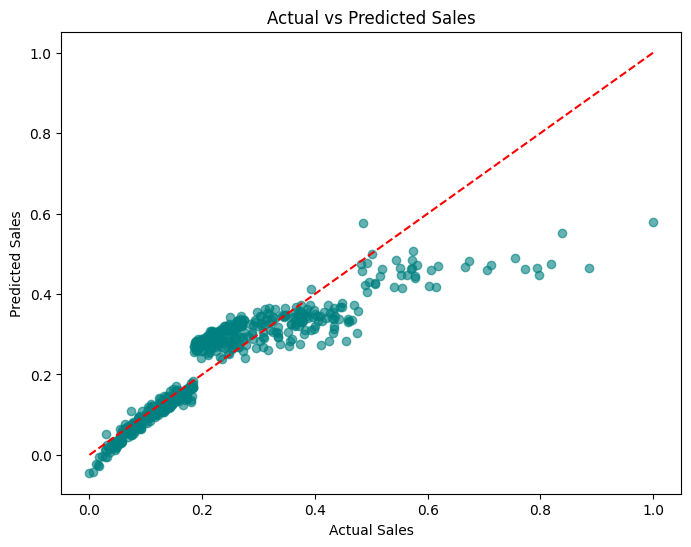

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()


In [9]:
# Optional: Train a Random Forest model for comparison
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_r2 = r2_score(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)

print("Random Forest R2:", rf_r2)
print("Random Forest MAE:", rf_mae)


Random Forest R2: 0.88838786305908
Random Forest MAE: 0.02568259795230147
